In [1]:
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

quandl.ApiConfig.api_key = '57jsryd5wUoVJnCLeadb'
results=pd.read_csv('results.csv')

In [2]:

def get_previous_quarter(date_str):
    # Convert the input string to a datetime object
    date = pd.Timestamp(date_str)
    
    # Get the current quarter of the datetime
    current_quarter = date.quarter
    
    # Determine the previous quarter and adjust the year if needed
    if current_quarter == 1:
        previous_quarter = 4
        year = date.year - 1
    else:
        previous_quarter = current_quarter - 1
        year = date.year
    
    # Return the result as "Q<quarter> <year>"
    return f"Q{previous_quarter} {year}"

def current_quarter(date_str):
    # Convert the input string to a datetime object
    date = pd.Timestamp(date_str)
    
    # Get the current quarter of the datetime
    current_quarter = date.quarter
    
    # Determine the previous quarter and adjust the year if needed
    year = date.year
    
    # Return the result as "Q<quarter> <year>"
    return f"Q{current_quarter} {year}"


In [3]:
data_MT = quandl.get_table('ZACKS/MT', ticker = list(results['Short_ticker'].unique()), paginate = True)
set(data_MT.zacks_x_sector_desc)

{'Aerospace',
 'Auto/Tires/Trucks',
 'Basic Materials',
 'Business Services',
 'Computer and Technology',
 'Construction',
 'Consumer Discretionary',
 'Consumer Staples',
 'Finance',
 'Industrial Products',
 'Medical',
 'Multi-Sector Conglomerates',
 None,
 'Oils/Energy',
 'Retail/Wholesale',
 'Transportation',
 'Utilities'}

In [4]:

data_FR = quandl.get_table('ZACKS/FR', ticker = list(results['Short_ticker'].unique()), paginate = True, per_end_date={'gte' : '2016-01-01', 'lte' : '2023-12-31'})
data_FR.head()

,m_ticker,ticker,comp_name,comp_name_2,exchange,currency_code,per_end_date,per_type,per_code,per_fisc_year,...,invty_turn,rcv_turn,day_sale_rcv,ret_equity,ret_tang_equity,ret_asset,ret_invst,free_cash_flow_per_share,book_val_per_share,oper_cash_flow_per_share
None,,,,,,,,,,,,,,,,,,,,,
0,ZY,TJX,The TJX Companies,"The TJX Companies, Inc.",NYSE,USD,2023-10-31,Q,None,2024,...,1.1031,19.0589,4.7222,17.4301,17.6732,3.9241,12.2860,1.7073,5.9900,2.8126
1,ZY,TJX,The TJX Companies,"The TJX Companies, Inc.",NYSE,USD,2023-07-31,Q,None,2024,...,1.3531,18.3305,4.9099,14.9667,15.1850,3.4195,10.4446,1.0904,5.7714,1.7967
2,ZY,TJX,The TJX Companies,"The TJX Companies, Inc.",NYSE,USD,2023-04-30,Q,None,2024,...,1.3001,18.6145,4.8349,13.8742,14.0825,3.1066,9.5992,0.3296,5.5835,0.6395
3,ZY,TJX,The TJX Companies,"The TJX Companies, Inc.",NYSE,USD,2023-01-31,Q,None,2023,...,1.8441,21.2903,4.2273,16.3105,16.5630,3.6615,11.2545,2.2301,5.5079,3.4669
4,ZY,TJX,The TJX Companies,"The TJX Companies, Inc.",NYSE,USD,2022-10-31,Q,None,2023,...,1.0354,17.0645,5.2741,18.7643,19.0844,3.7393,12.4721,-0.0350,4.8994,0.9036


In [5]:
data_MT

,m_ticker,ticker,comp_name,comp_name_2,exchange,currency_code,ticker_type,active_ticker_flag,comp_url,sic_4_code,...,per_end_month_nbr,mr_split_date,mr_split_factor,comp_cik,country_code,country_name,comp_type,optionable_flag,sp500_member_flag,asset_type
None,,,,,,,,,,,,,,,,,,,,,
0,ZY,TJX,The TJX Companies,"The TJX Companies, Inc.",NYSE,USD,S,Y,http://www.tjx.com,5651.0,...,1,2018-11-07,2.00,0000109198,US,UNITED STATES,1.0,Y,Y,COM
1,ZTS,ZTS,Zoetis,Zoetis Inc.,NYSE,USD,S,Y,http://www.zoetis.com,2834.0,...,12,NaT,NaN,0001555280,US,UNITED STATES,1.0,Y,Y,COM
2,ZS,ZS,Zscaler,"Zscaler, Inc.",NASDAQ,USD,S,Y,http://www.zscaler.com,7371.0,...,7,NaT,NaN,0001713683,US,UNITED STATES,1.0,Y,N,COM
3,ZMH,ZBH,Zimmer Biomet,"Zimmer Biomet Holdings, Inc.",NYSE,USD,S,Y,http://www.zimmerbiomet.com,3842.0,...,12,NaT,NaN,0001136869,US,UNITED STATES,1.0,Y,Y,COM
4,ZM,ZM,Zoom Video Communications,"Zoom Video Communications, Inc.",NASDAQ,USD,S,Y,http://www.zoom.us,7370.0,...,1,NaT,NaN,0001585521,US,UNITED STATES,1.0,Y,N,COM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,AAP2,AAP,Advance Auto Parts,"Advance Auto Parts, Inc.",NYSE,USD,S,Y,http://www.advanceautoparts.com,5531.0,...,12,2005-09-26,1.50,0001158449,US,UNITED STATES,1.0,Y,N,COM
843,AAL,AAL,American Airlines,American Airlines Group Inc.,NASDAQ,USD,S,Y,http://www.aa.com,4512.0,...,12,NaT,NaN,0000006201,US,UNITED STATES,1.0,Y,Y,COM
844,AA2,AA,Alcoa,Alcoa,NYSE,USD,S,Y,http://www.alcoa.com,3334.0,...,12,NaT,NaN,0001675149,US,UNITED STATES,1.0,Y,N,COM


### PnL Analysis across sectors

In [6]:
results_new=results[['Short_ticker','trade_entry','straddle_pnl']]
merged_df = pd.merge( results_new,data_MT, left_on='Short_ticker' , right_on='ticker', how='left')
#merged_df['sector_code']=merged_df['Short_ticker'].apply(lambda x: sector_code[x])

merged_df['quarter']=merged_df['trade_entry'].apply(lambda x: get_previous_quarter(x))
merged_df['quarter_with_ticker']=merged_df['quarter']+merged_df['Short_ticker']
merged_df.drop_duplicates(subset='quarter_with_ticker',inplace=True)

data_FR['quarter']=data_FR['per_end_date'].apply(lambda x: current_quarter(x))
data_FR['quarter_with_ticker']=data_FR['quarter']+data_FR['ticker']
data_FR.drop_duplicates(subset='quarter_with_ticker',inplace=True)

merged_df = pd.merge(merged_df,data_FR, left_on='quarter_with_ticker' , right_on='quarter_with_ticker', how='left')

# Display the merged dataframe
print(merged_df)


      Short_ticker trade_entry  straddle_pnl m_ticker_x ticker_x  \
0                A  2018-02-14    120.507400         A2        A   
1                A  2018-05-14  -1278.931751         A2        A   
2                A  2018-08-14    408.791209         A2        A   
3                A  2018-11-19           NaN         A2        A   
4                A  2019-02-20           NaN         A2        A   
...            ...         ...           ...        ...      ...   
18277          ZTS  2023-02-13   -199.186992        ZTS      ZTS   
18278          ZTS  2023-05-03           NaN        ZTS      ZTS   
18279          ZTS  2023-08-07           NaN        ZTS      ZTS   
18280          ZTS  2023-11-01           NaN        ZTS      ZTS   
18281          ZTS  2024-02-12           NaN        ZTS      ZTS   

                comp_name_x               comp_name_2_x exchange_x  \
0      Agilent Technologies  Agilent Technologies, Inc.       NYSE   
1      Agilent Technologies  Agilent Techno

In [7]:
merged_df['tot_debt_tot_equity_class']=['low_debt/eq' if x < 1 else 'good debt/eq' if x< 1.5 else 'high_debt/eq' for x in merged_df['tot_debt_tot_equity'] ]
new_df=merged_df[['tot_debt_tot_equity_class','zacks_x_sector_desc','straddle_pnl','quarter_with_ticker']]
new_df.dropna(inplace=True)

C:\Users\swa19\AppData\Local\Temp\ipykernel_15100\3062007935.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(inplace=True)


In [8]:
grouped = new_df.groupby(['tot_debt_tot_equity_class', 'zacks_x_sector_desc'])['straddle_pnl'].mean()

# Reshape the data so each class becomes a column
result_df = grouped.unstack(level=0)

# Display the resulting DataFrame
print(result_df)

tot_debt_tot_equity_class   good debt/eq  high_debt/eq  low_debt/eq
zacks_x_sector_desc                                                
Aerospace                     -50.392389     33.551570    46.511626
Auto/Tires/Trucks             187.950093     23.842565   147.774006
Basic Materials                96.036580    169.535382    92.899460
Business Services              55.508034    156.593109    66.729202
Computer and Technology      -101.412314    -27.725877    -0.561812
Construction                 -505.668537    -26.935534    96.342600
Consumer Discretionary         93.783966     65.250805    40.236222
Consumer Staples              -98.364010     13.074544    19.995005
Finance                       -21.658382     -0.098042   -56.381071
Industrial Products         -1829.429332     51.626291    36.068289
Medical                       141.225696   -143.283484    67.764394
Multi-Sector Conglomerates     17.374537   -310.686433    12.760719
Oils/Energy                   -52.067165     36.

In [9]:
new_df['straddle_pnl']=new_df['straddle_pnl'].apply(lambda x: round(x,2))

C:\Users\swa19\AppData\Local\Temp\ipykernel_15100\3443538962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['straddle_pnl']=new_df['straddle_pnl'].apply(lambda x: round(x,2))


In [10]:
grouped = new_df.groupby(["zacks_x_sector_desc", "tot_debt_tot_equity_class"])

In [11]:
grouped = new_df.groupby(["zacks_x_sector_desc", "tot_debt_tot_equity_class"])

grouped

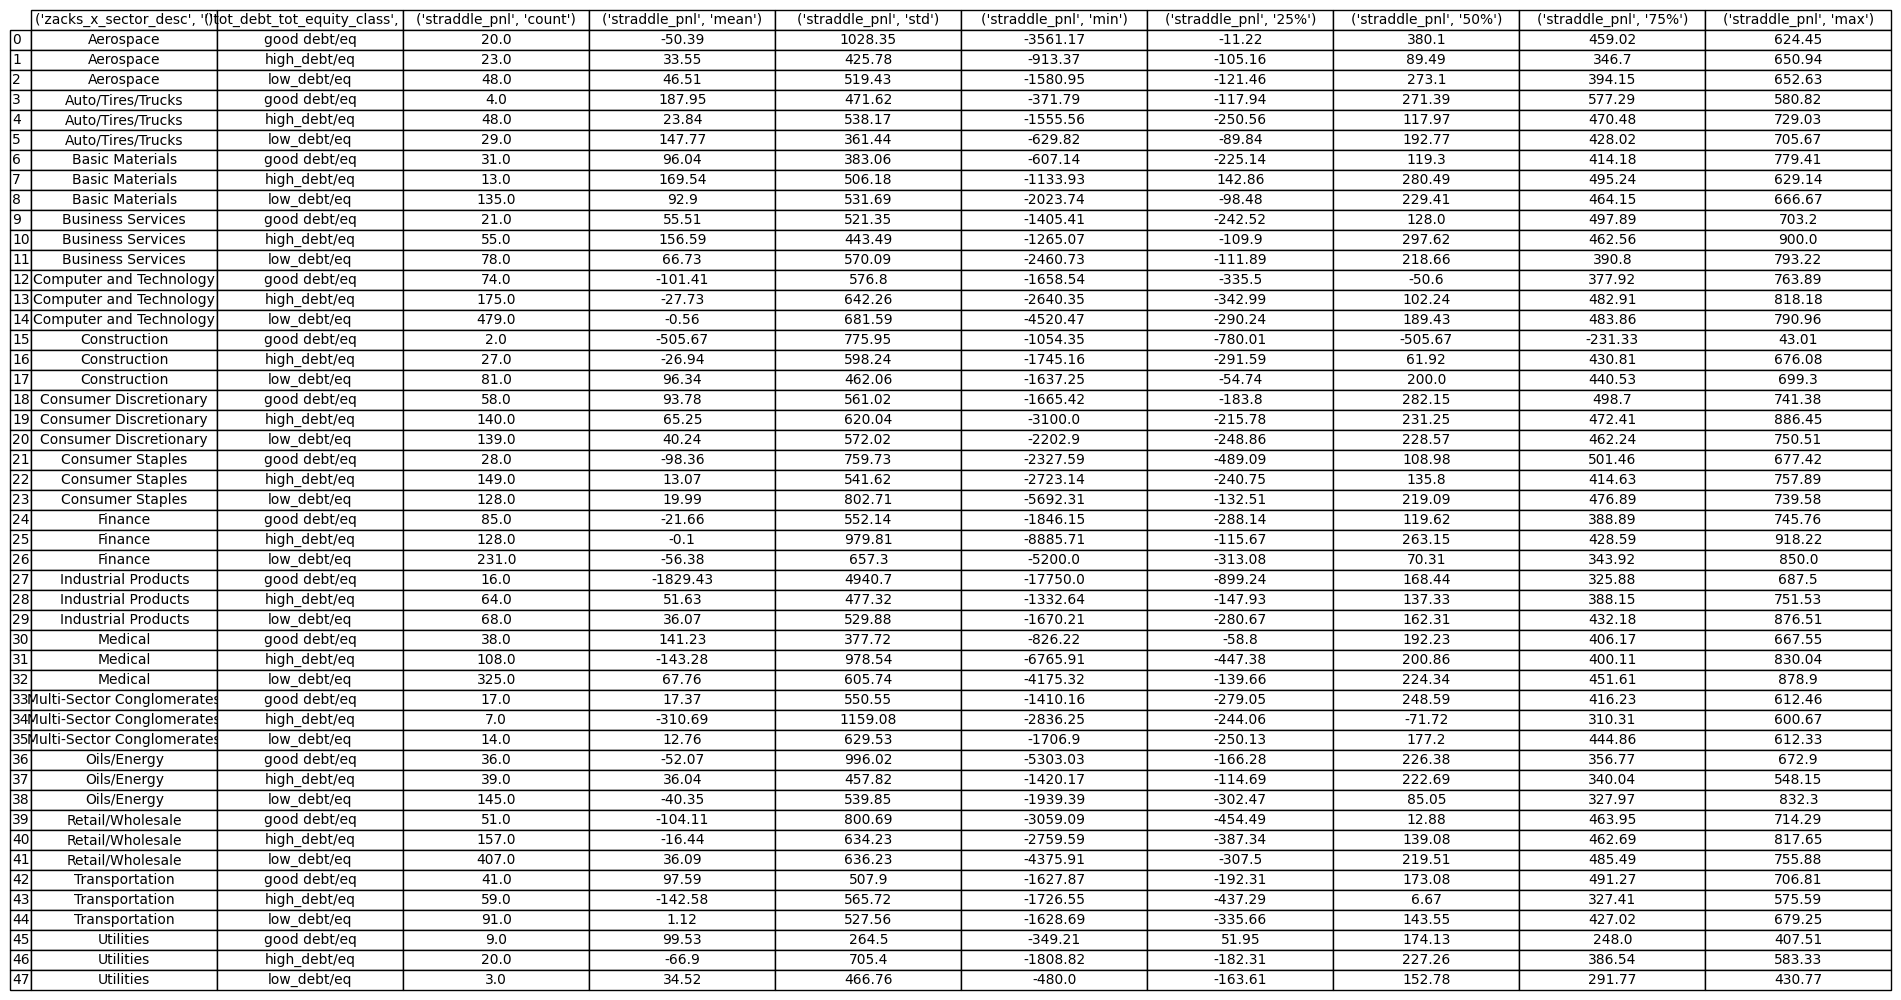

In [12]:
# Grouping the data
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table
grouped = new_df.groupby(["zacks_x_sector_desc", "tot_debt_tot_equity_class"])
grouped_details = grouped.describe().reset_index()
grouped_details = grouped_details.round(2)
# Plotting the table
fig, ax = plt.subplots(figsize=(10, 6))  # Set the size of the figure
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)
tab = table(ax, grouped_details, loc='center', cellLoc='center', colWidths=[0.2]*len(grouped_details.columns))

# Style the table
tab.auto_set_font_size(False)
tab.set_fontsize(10)
tab.scale(1.2, 1.2)

# Save the table as an image
plt.savefig('grouped_details_table.png', bbox_inches='tight', pad_inches=0.1)

# Display the table
plt.show()










In [13]:
new_df

,tot_debt_tot_equity_class,zacks_x_sector_desc,straddle_pnl,quarter_with_ticker
0,low_debt/eq,Computer and Technology,120.51,Q4 2017A
1,low_debt/eq,Computer and Technology,-1278.93,Q1 2018A
2,low_debt/eq,Computer and Technology,408.79,Q2 2018A
5,low_debt/eq,Computer and Technology,-1101.96,Q1 2019A
6,low_debt/eq,Computer and Technology,-4.31,Q2 2019A
...,...,...,...,...
18267,high_debt/eq,Medical,539.17,Q4 2019ZTS
18268,high_debt/eq,Medical,228.45,Q1 2020ZTS
18269,high_debt/eq,Medical,320.00,Q2 2020ZTS
18273,good debt/eq,Medical,356.35,Q4 2021ZTS


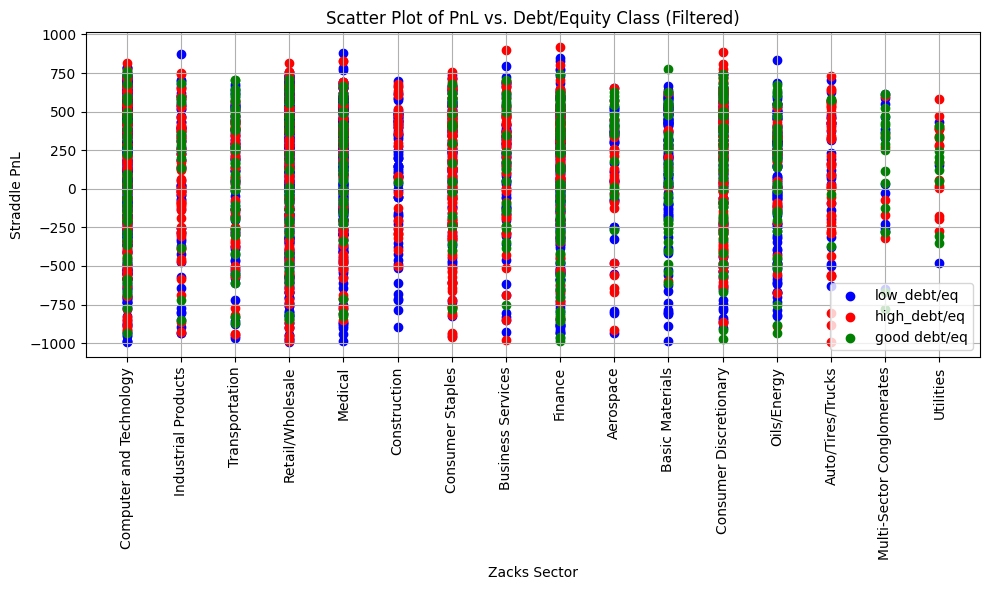

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
# Define colors for different debt/equity classes

# Filter the DataFrame for PnL values between -1000 and 1000
filtered_df = new_df[(new_df['straddle_pnl'] >= -1000) & (new_df['straddle_pnl'] <= 1000)]

# Define colors for different debt/equity classes
colors = {'low_debt/eq': 'blue', 'high_debt/eq': 'red', 'good debt/eq': 'green'}

# Plotting the scatter plot with zacks_x_sector_desc on the x-axis for filtered data
plt.figure(figsize=(10, 6))
for debt_class in filtered_df['tot_debt_tot_equity_class'].unique():
    subset = filtered_df[filtered_df['tot_debt_tot_equity_class'] == debt_class]
    plt.scatter(subset['zacks_x_sector_desc'], subset['straddle_pnl'], color=colors[debt_class], label=debt_class)

plt.xlabel('Zacks Sector')
plt.ylabel('Straddle PnL')
plt.title('Scatter Plot of PnL vs. Debt/Equity Class (Filtered)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()

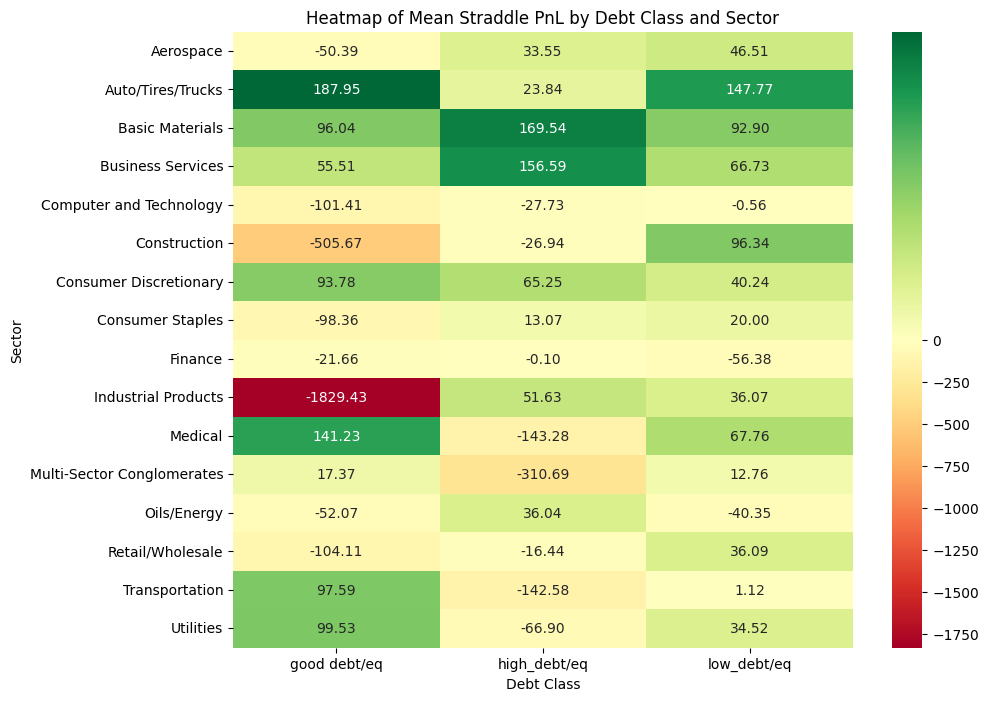

In [15]:


# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Calculate vmin and vmax for color normalization
vmin = result_df.min().min()
vmax = result_df.max().max()
vcenter = 0
norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)

# Create a heatmap with annotations and using the normalized RdYlGn colormap
sns.heatmap(result_df, annot=True, cmap='RdYlGn', fmt=".2f", norm=norm)

# Add titles and labels
plt.title('Heatmap of Mean Straddle PnL by Debt Class and Sector')
plt.xlabel('Debt Class')
plt.ylabel('Sector')

# Display the heatmap
plt.show()


In [16]:
merged_df = pd.merge( results,data_MT, left_on='Short_ticker' , right_on='ticker', how='left')
#merged_df['sector_code']=merged_df['Short_ticker'].apply(lambda x: sector_code[x])
merged_df

,Unnamed: 0.1,Unnamed: 0,index,Short_ticker,Name,Ticker,Date,Event Type,Adjusted Trading Date,trade_entry,...,per_end_month_nbr,mr_split_date,mr_split_factor,comp_cik,country_code,country_name,comp_type,optionable_flag,sp500_member_flag,asset_type
0,0,0,396,A,Agilent Technologies Inc,A US,2018-02-14 16:05:00,ER,2018-02-15 00:00:00+00:00,2018-02-14,...,10.0,NaT,NaN,0001090872,US,UNITED STATES,1.0,Y,Y,COM
1,1,1,1298,A,Agilent Technologies Inc,A US,2018-05-14 16:05:00,ER,2018-05-15 00:00:00+00:00,2018-05-14,...,10.0,NaT,NaN,0001090872,US,UNITED STATES,1.0,Y,Y,COM
2,2,2,2023,A,Agilent Technologies Inc,A US,2018-08-14 16:05:00,ER,2018-08-15 00:00:00+00:00,2018-08-14,...,10.0,NaT,NaN,0001090872,US,UNITED STATES,1.0,Y,Y,COM
3,3,3,2754,A,Agilent Technologies Inc,A US,2018-11-19 16:05:00,ER,2018-11-20 00:00:00+00:00,2018-11-19,...,10.0,NaT,NaN,0001090872,US,UNITED STATES,1.0,Y,Y,COM
4,4,4,3297,A,Agilent Technologies Inc,A US,2019-02-20 16:05:00,ER,2019-02-21 00:00:00+00:00,2019-02-20,...,10.0,NaT,NaN,0001090872,US,UNITED STATES,1.0,Y,Y,COM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19471,19471,19471,15969,ZTS,Zoetis Inc,ZTS US,2023-02-14 07:00:00,ER,2023-02-13 00:00:00+00:00,2023-02-13,...,12.0,NaT,NaN,0001555280,US,UNITED STATES,1.0,Y,Y,COM
19472,19472,19472,16912,ZTS,Zoetis Inc,ZTS US,2023-05-04 07:00:00,ER,2023-05-03 00:00:00+00:00,2023-05-03,...,12.0,NaT,NaN,0001555280,US,UNITED STATES,1.0,Y,Y,COM
19473,19473,19473,17936,ZTS,Zoetis Inc,ZTS US,2023-08-08 07:00:00,ER,2023-08-07 00:00:00+00:00,2023-08-07,...,12.0,NaT,NaN,0001555280,US,UNITED STATES,1.0,Y,Y,COM
19474,19474,19474,18652,ZTS,Zoetis Inc,ZTS US,2023-11-02 07:00:00,ER,2023-11-01 00:00:00+00:00,2023-11-01,...,12.0,NaT,NaN,0001555280,US,UNITED STATES,1.0,Y,Y,COM


In [19]:
new_df.groupby('tot_debt_tot_equity_class').describe()

straddle_pnl                                    \
                                 count       mean          std       min   
tot_debt_tot_equity_class                                                  
good debt/eq                     531.0 -55.895706  1085.913235 -17750.00   
high_debt/eq                    1212.0  -5.813944   681.058399  -8885.71   
low_debt/eq                     2401.0  25.250079   620.558921  -5692.31   

                                                               
                                25%     50%       75%     max  
tot_debt_tot_equity_class                                      
good debt/eq              -268.7550  136.89  438.6400  779.41  
high_debt/eq              -260.8925  174.98  424.2475  918.22  
low_debt/eq               -230.7700  197.62  454.5500  878.90

In [18]:
new_df.to_csv('straddle_pnl_across_debt_class.csv')